In [80]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(0)

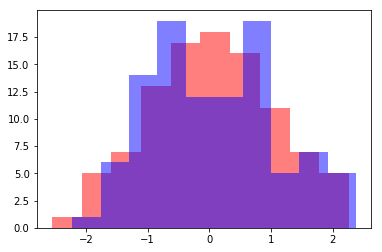

In [65]:
dis1 = np.random.randn(100,1) ;  dis2 = np.random.randn(100,1) 
plt.hist(dis1,color='Red',alpha=0.5) ; plt.hist(dis2,color='Blue',alpha=0.5) ; plt.show()

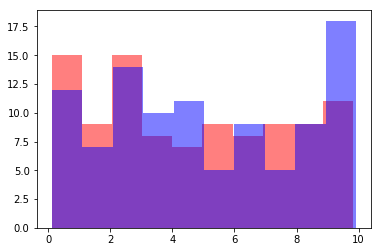

[[9.61936379 2.92147527 2.4082878 ]] [[3.92675677 9.56405723 1.87130892]]


In [66]:
dis1 = np.random.uniform(low=0,high=10,size=(100,1)) ;  dis2 = np.random.uniform(low=0,high=10,size=(100,1))
plt.hist(dis1,color='Red',alpha=0.5) ; plt.hist(dis2,color='Blue',alpha=0.5) ; plt.show()
print(dis1[:3].T,dis2[:3].T)

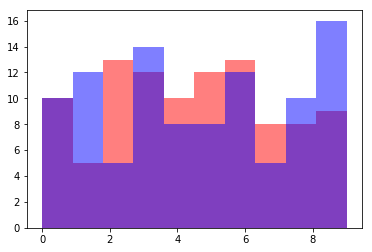

[7 8 2] [6 8 6]


In [67]:
elements      = [0,1,2,3,4,5,6,7,8,9,10]
probabilities = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.0]
dis1 = np.random.choice(elements, 100, p=probabilities) ; dis2 = np.random.choice(elements, 100, p=probabilities)
plt.hist(dis1,color='Red',alpha=0.5); plt.hist(dis2,color='Blue',alpha=0.5) ; plt.show()
print(dis1[:3].T,dis2[:3].T)

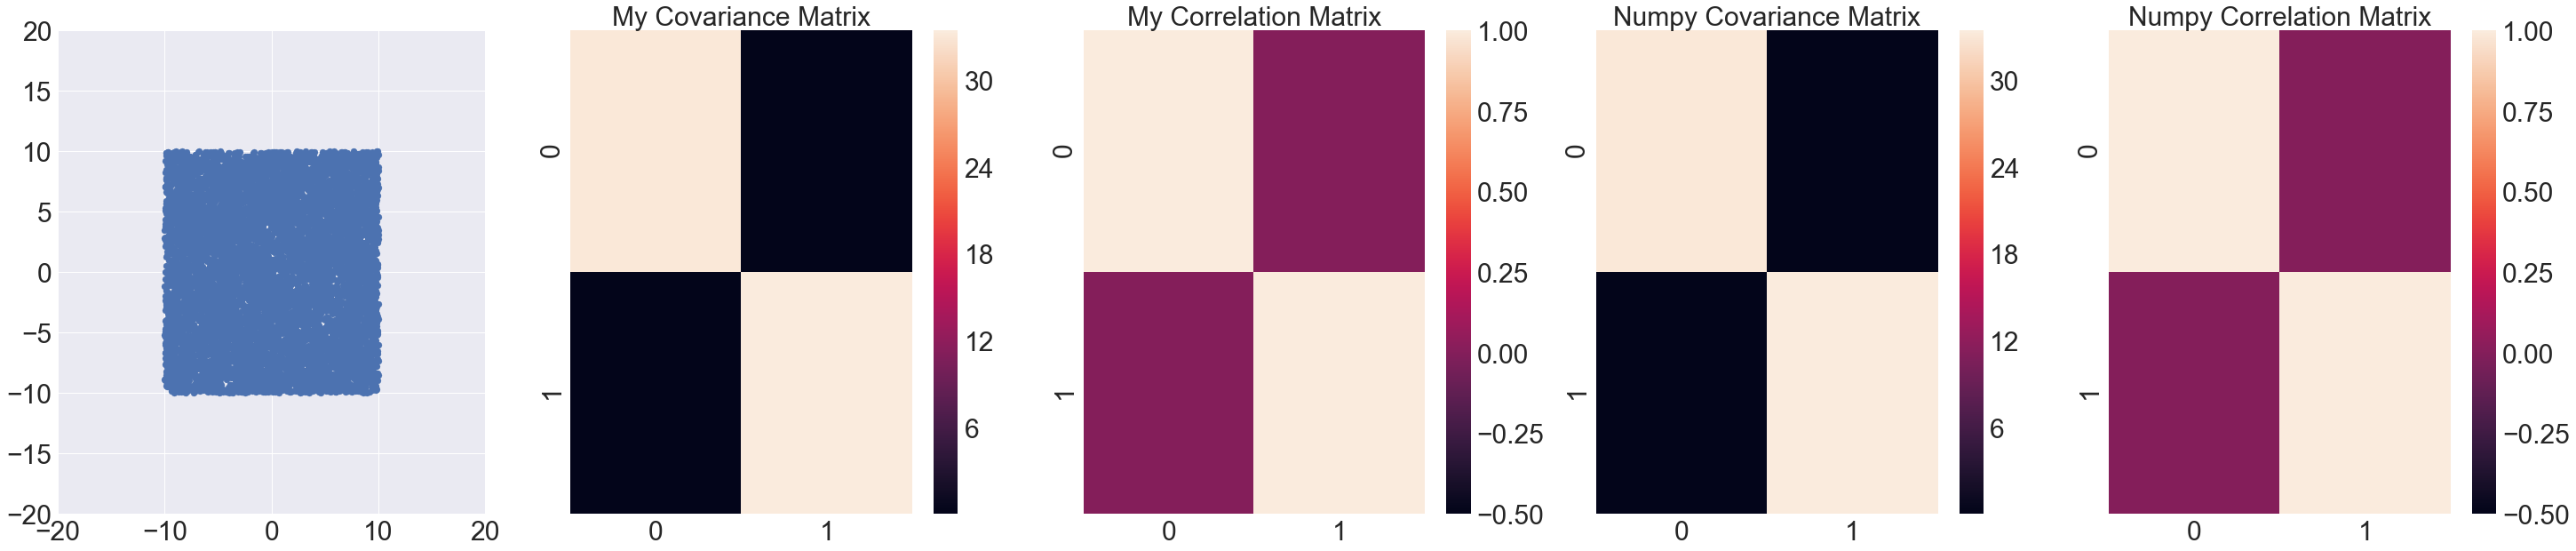

In [220]:
dis1 = np.random.uniform(low=-10,high=10,size=(9000,1)) ;  dis2 = np.random.uniform(low=-10,high=10,size=(9000,1))
plt.figure(figsize=(50,10))

plt.subplot(151); plt.xlim(-20,20);plt.ylim(-20,20); plt.scatter(dis1,dis2)

dis_all = np.hstack((dis1,dis2))
dis_all = (dis_all - dis_all.mean(0))
covariance_mat = dis_all.T @ dis_all / (dis_all.shape[0])

dis_all = dis_all / dis_all.std(0)
correlation_mat= dis_all.T @ dis_all / (dis_all.shape[0])

sns.set(font_scale=3.)
plt.subplot(152); sns.heatmap(covariance_mat);   plt.title('My Covariance Matrix',fontsize=30);
plt.subplot(153); sns.heatmap( correlation_mat,vmin=-0.5); plt.title('My Correlation Matrix',fontsize=30);

dis_all = np.hstack((dis1,dis2))
plt.subplot(154); sns.heatmap(np.cov(dis_all.T));       plt.title('Numpy Covariance Matrix',fontsize=30);
plt.subplot(155); sns.heatmap(np.corrcoef(dis_all.T) ,vmin=-0.5); plt.title('Numpy Correlation Matrix',fontsize=30);
plt.show()

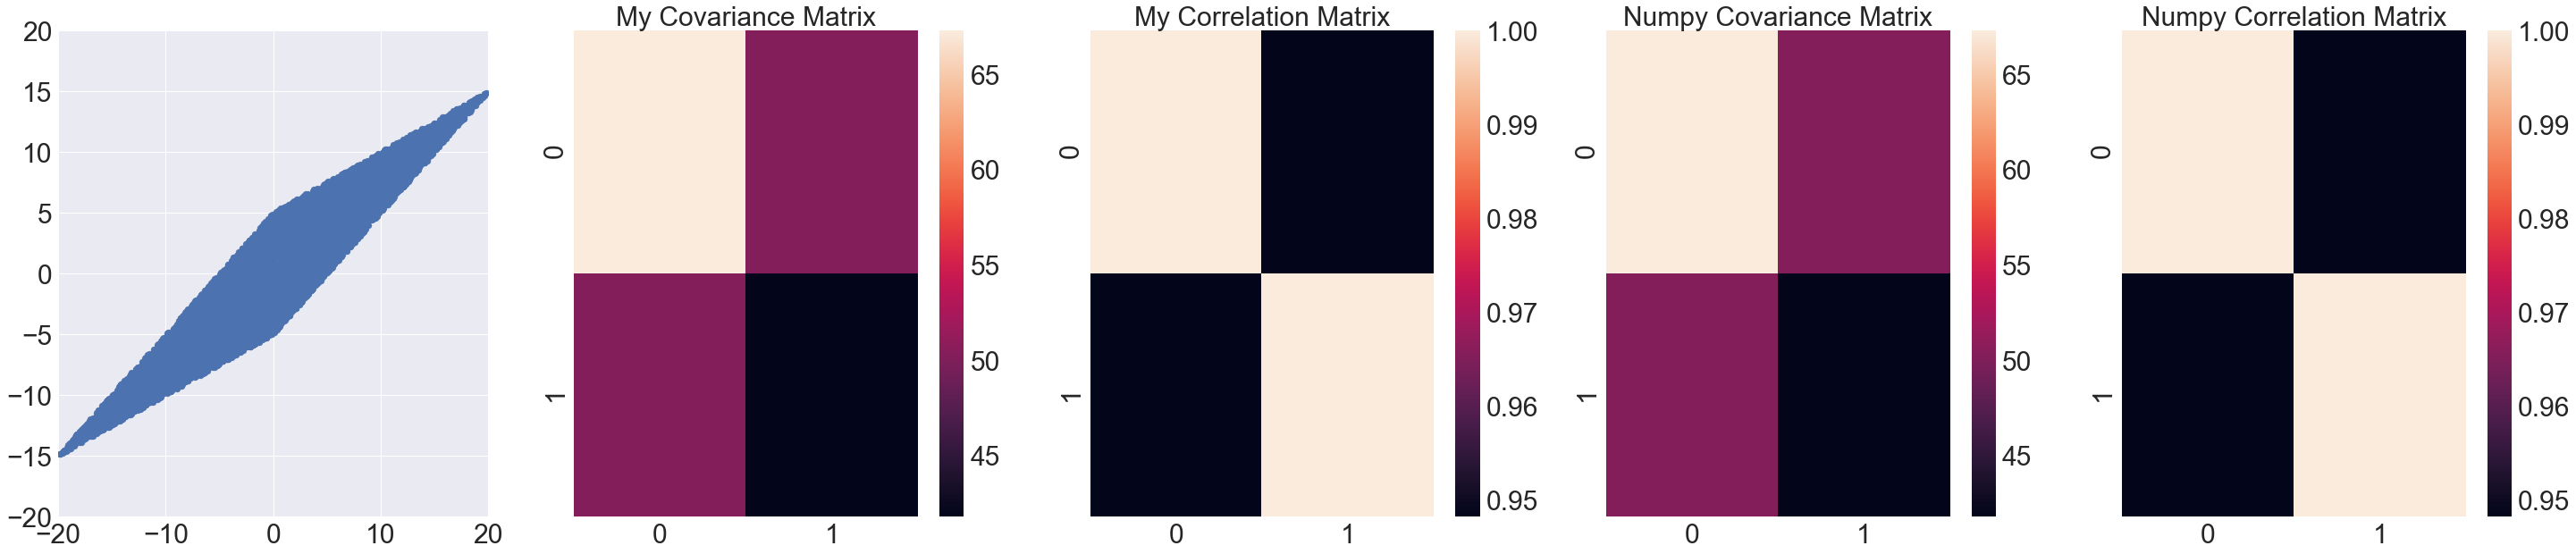

In [216]:
dis_all = np.hstack((dis1,dis2))
mix_matrix = np.array([
    [1,0.5],
    [1,1]
])
dis_mixed = dis_all @ mix_matrix

plt.figure(figsize=(50,10))
plt.subplot(151); plt.xlim(-20,20);plt.ylim(-20,20); plt.scatter(dis_mixed[:,0],dis_mixed[:,1])

dis_all = dis_mixed
dis_all = (dis_all - dis_all.mean(0))
covariance_mat = dis_all.T @ dis_all / (dis_all.shape[0])

dis_all = dis_all / dis_all.std(0)
correlation_mat= dis_all.T @ dis_all / (dis_all.shape[0])
sns.set(font_scale=3.)
plt.subplot(152); sns.heatmap(covariance_mat);   plt.title('My Covariance Matrix',fontsize=30);
plt.subplot(153); sns.heatmap(correlation_mat);  plt.title('My Correlation Matrix',fontsize=30);

dis_all = np.hstack((dis1,dis2))
dis_mixed = dis_all @ mix_matrix
plt.subplot(154); sns.heatmap(np.cov(dis_mixed.T));       plt.title('Numpy Covariance Matrix',fontsize=30);
plt.subplot(155); sns.heatmap(np.corrcoef(dis_mixed.T) ); plt.title('Numpy Correlation Matrix',fontsize=30);
plt.show()

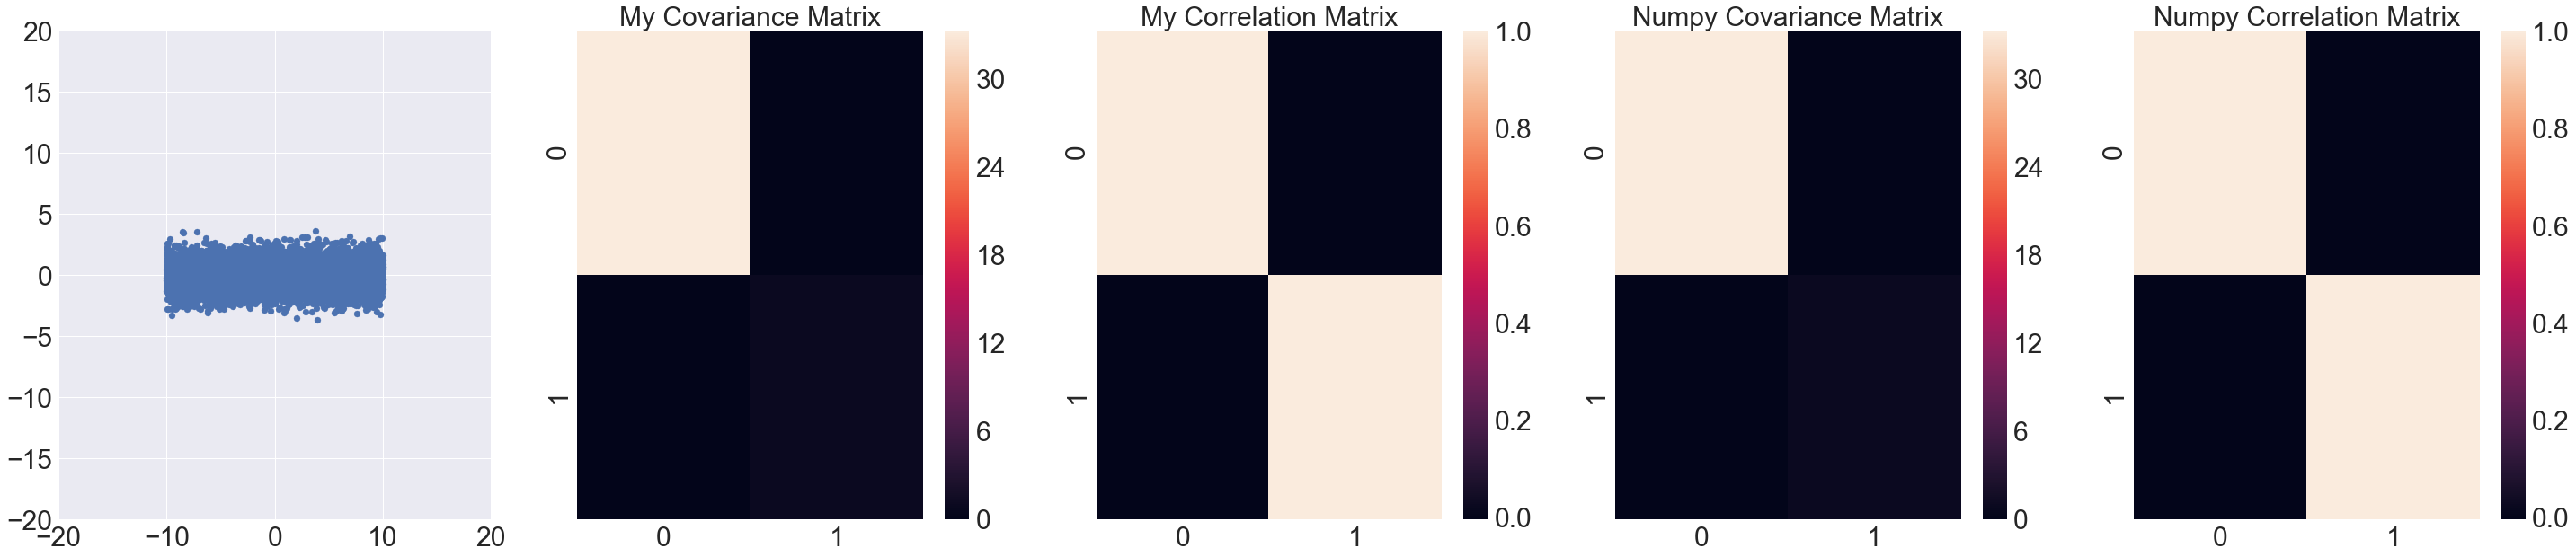

In [217]:
dis1 = np.random.uniform(low=-10,high=10,size=(9000,1)) ;  dis2 = np.random.randn(9000,1)
plt.figure(figsize=(50,10))

dis_all = np.hstack((dis1,dis2))
plt.subplot(151); plt.xlim(-20,20);plt.ylim(-20,20); plt.scatter(dis_all[:,0],dis_all[:,1])

dis_all = (dis_all - dis_all.mean(0))
covariance_mat = dis_all.T @ dis_all / (dis_all.shape[0])

dis_all = dis_all / dis_all.std(0)
correlation_mat= dis_all.T @ dis_all / (dis_all.shape[0])

sns.set(font_scale=3.)
plt.subplot(152); sns.heatmap(covariance_mat);   plt.title('My Covariance Matrix',fontsize=30);
plt.subplot(153); sns.heatmap(correlation_mat);  plt.title('My Correlation Matrix',fontsize=30);

dis_all = np.hstack((dis1,dis2))
plt.subplot(154); sns.heatmap(np.cov(dis_all.T));       plt.title('Numpy Covariance Matrix',fontsize=30);
plt.subplot(155); sns.heatmap(np.corrcoef(dis_all.T) ); plt.title('Numpy Correlation Matrix',fontsize=30);
plt.show() 

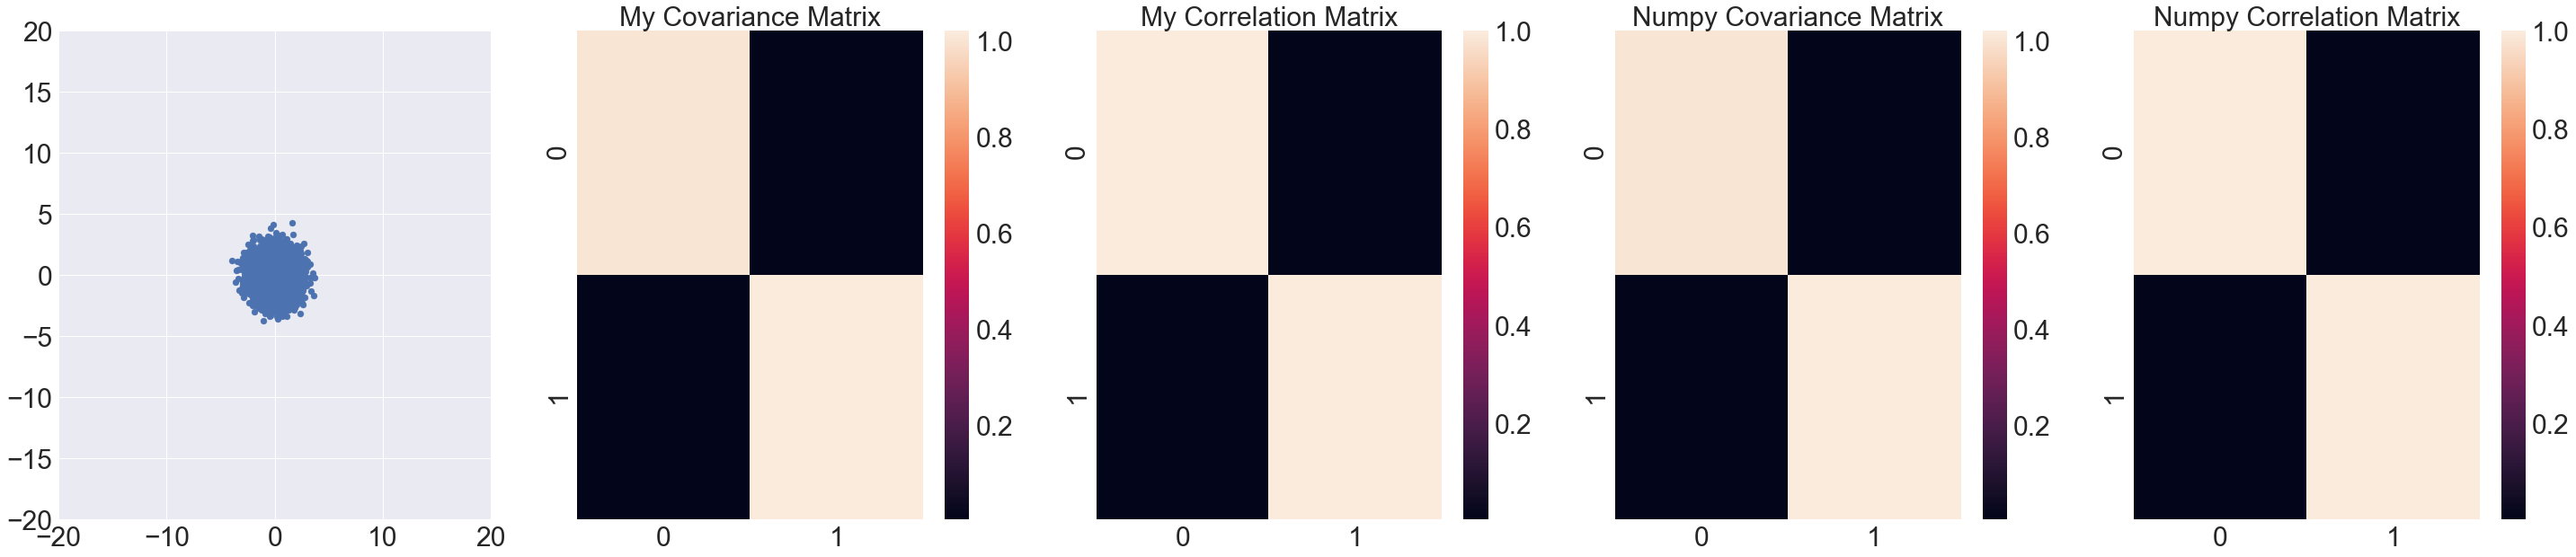

In [214]:
dis1 = np.random.randn(9000,1);  dis2 = np.random.randn(9000,1)
plt.figure(figsize=(50,10))

dis_all = np.hstack((dis1,dis2))
plt.subplot(151); plt.xlim(-20,20);plt.ylim(-20,20); plt.scatter(dis_all[:,0],dis_all[:,1])

dis_all = (dis_all - dis_all.mean(0))
covariance_mat = dis_all.T @ dis_all / (dis_all.shape[0])

dis_all = dis_all / dis_all.std(0)
correlation_mat= dis_all.T @ dis_all / (dis_all.shape[0])

sns.set(font_scale=3.)
plt.subplot(152); sns.heatmap(covariance_mat);   plt.title('My Covariance Matrix',fontsize=30);
plt.subplot(153); sns.heatmap(correlation_mat);  plt.title('My Correlation Matrix',fontsize=30);

dis_all = np.hstack((dis1,dis2))
plt.subplot(154); sns.heatmap(np.cov(dis_all.T));       plt.title('Numpy Covariance Matrix',fontsize=30);
plt.subplot(155); sns.heatmap(np.corrcoef(dis_all.T) ); plt.title('Numpy Correlation Matrix',fontsize=30);
plt.show() 

In [149]:
! git all-go

[master e907888f] s
 2 files changed, 592 insertions(+), 364 deletions(-)
 rewrite Understanding_Concepts/tf_korea_ppt/.ipynb_checkpoints/ppt-checkpoint.ipynb (77%)
 rewrite Understanding_Concepts/tf_korea_ppt/ppt.ipynb (77%)


The file will have its original line endings in your working directory.
The file will have its original line endings in your working directory.
To https://github.com/JaeDukSeo/Daily-Neural-Network-Practice-2
   768bd18a..e907888f  master -> master
